## Importing Libraries

In [1]:
# imporitng dataframe & numpy array libraires
import pandas as pd
import numpy as np

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='Set1')
# warnings to ignore warnings
import warnings 
warnings.filterwarnings('ignore')

# class for standardization
from sklearn.preprocessing import StandardScaler

# class for hierarchical, k-means, DBSCAN clustering
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

#
from scipy.cluster import hierarchy

#valuation metrics for clustering
from sklearn.metrics import silhouette_score

# for finding optimal k vlue for k means clustering
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer

## Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers
<br><\br>
- ID --Unique ID
<br><\br>
- Balance--Number of miles eligible for award travel
<br><\br>
- Qual_mile--Number of miles counted as qualifying for Topflight status
<br><\br>
- cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
- cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
- cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
<br><\br>
- 1 = under 5,000
- 2 = 5,000 - 10,000
- 3 = 10,001 - 25,000
- 4 = 25,001 - 50,000
- 5 = over 50,000
<br><\br>
- Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
- Bonus_trans--Number of non-flight bonus transactions in the past 12 months
- Flight_miles_12mo--Number of flight miles in the past 12 months
- Flight_trans_12--Number of flight transactions in the past 12 months
- Days_since_enrolled--Number of days since enrolled in flier program
- Award--whether that person had award flight (free flight) or not

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data', index_col=0)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [4]:
df.shape

(3999, 11)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [6]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

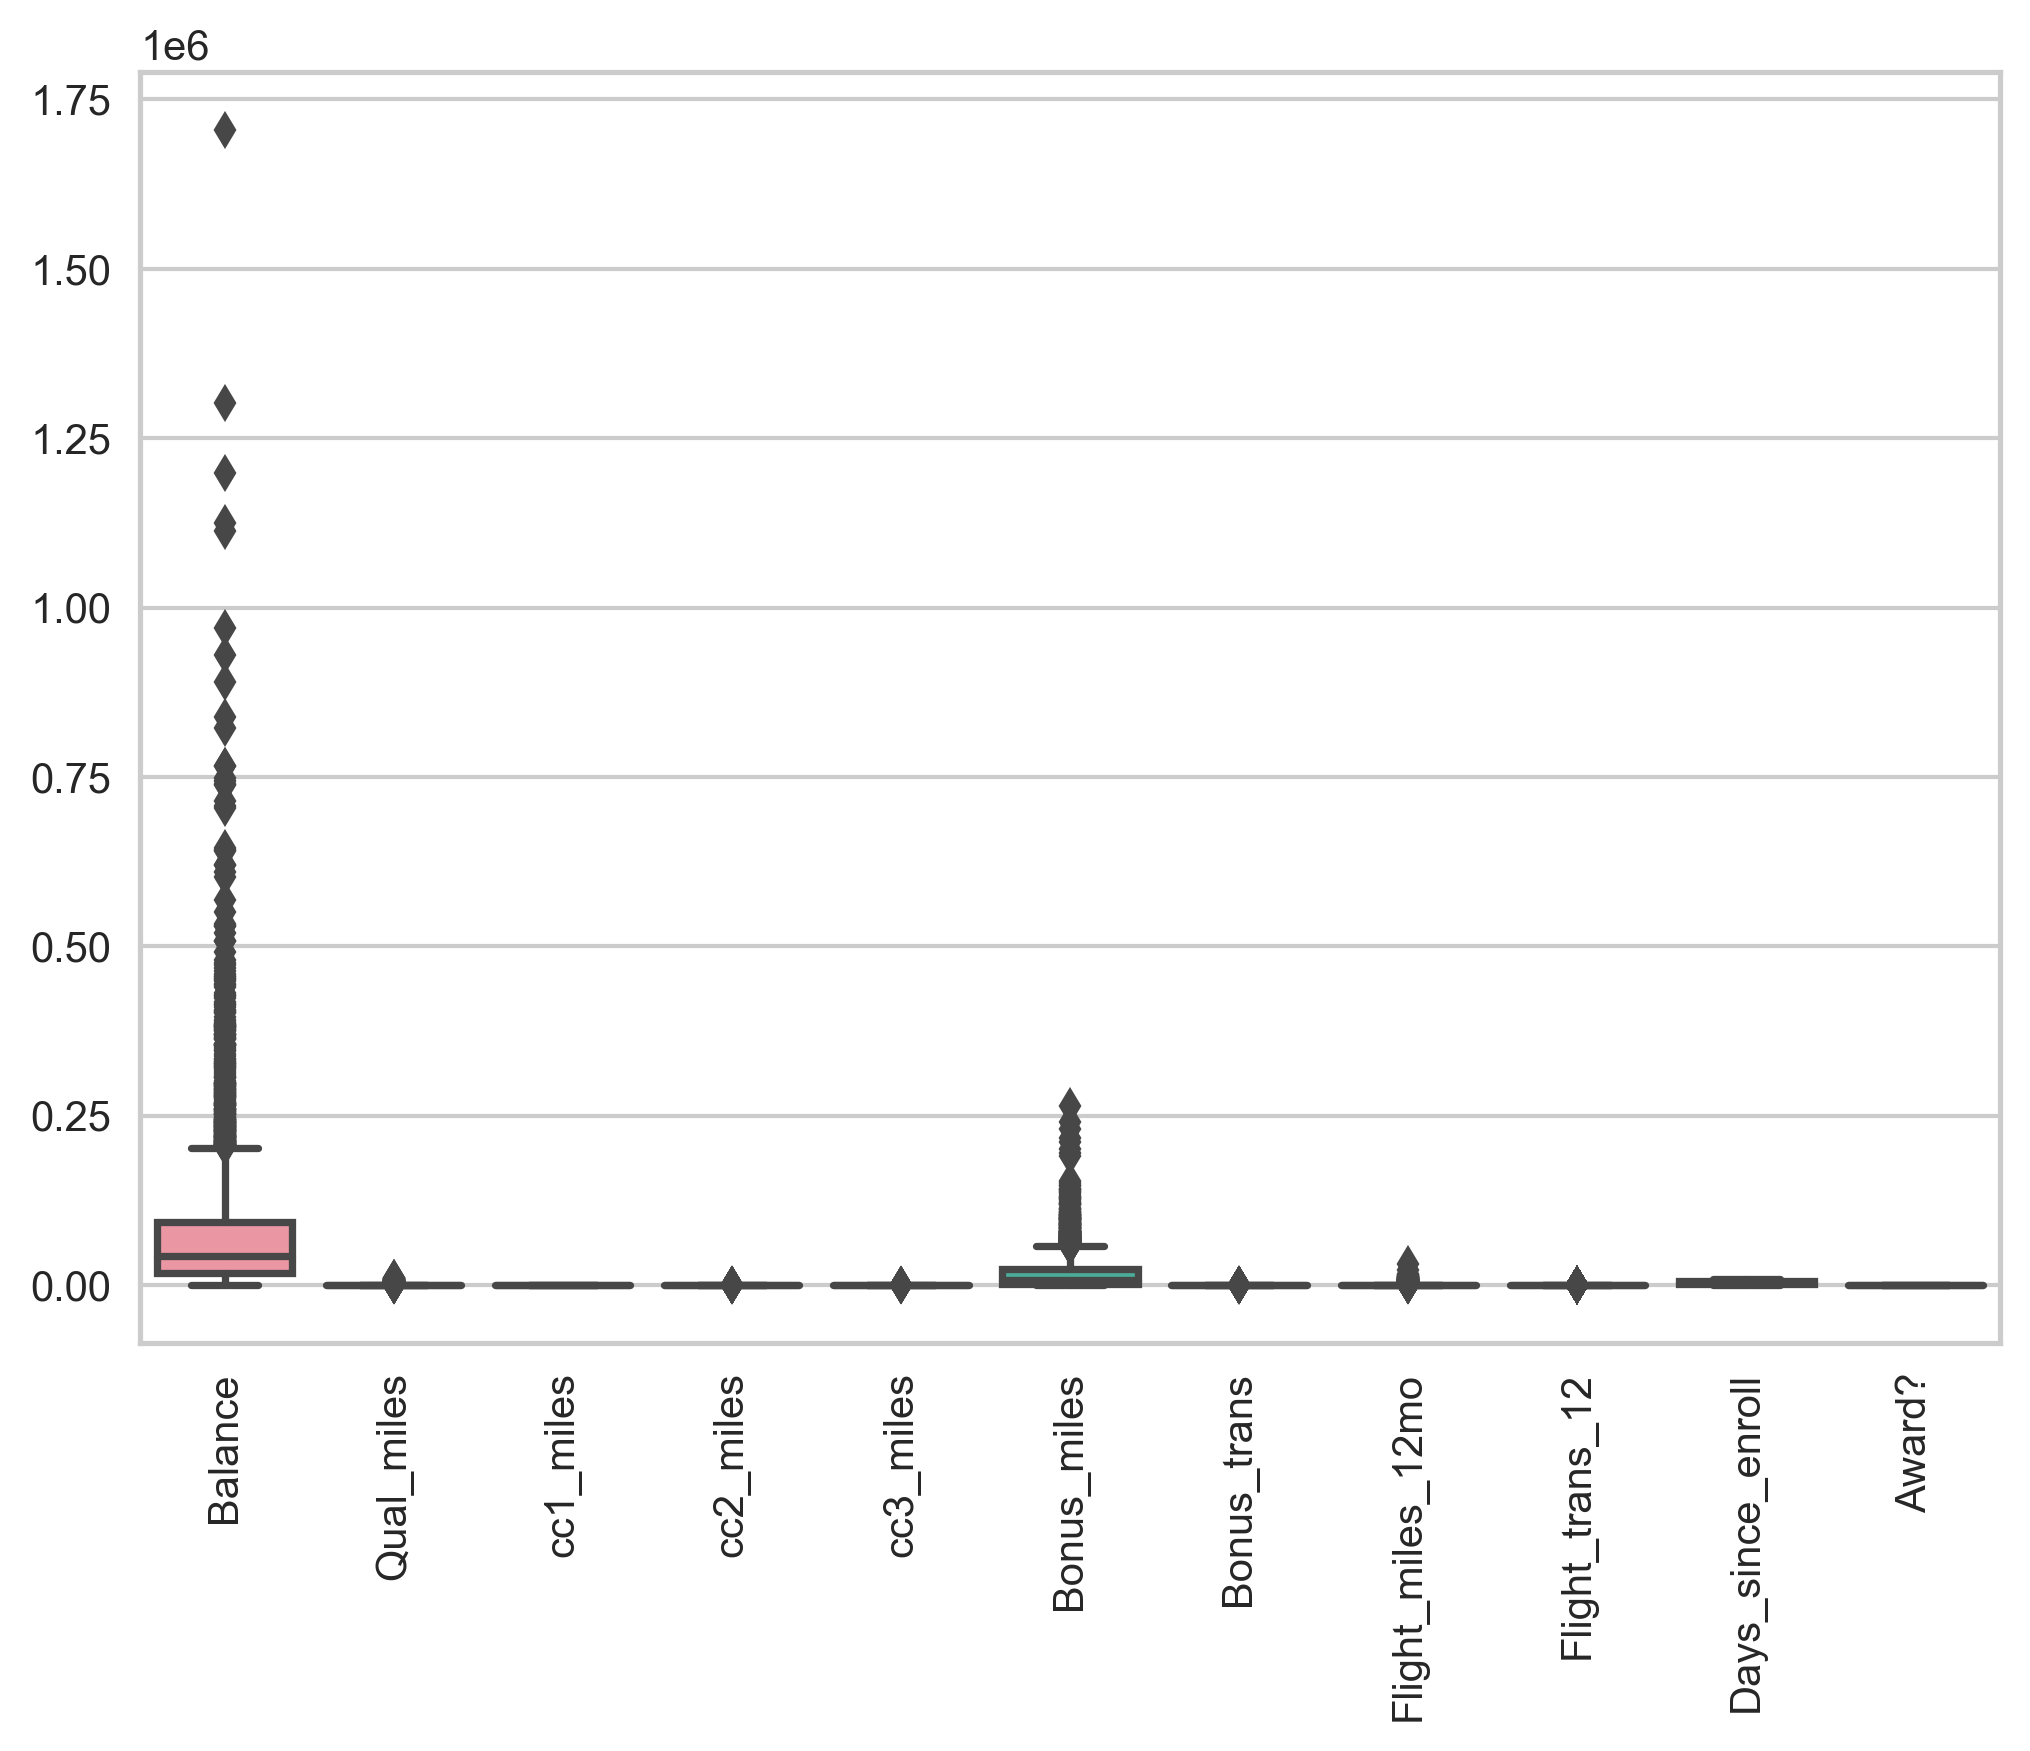

In [7]:
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.show()

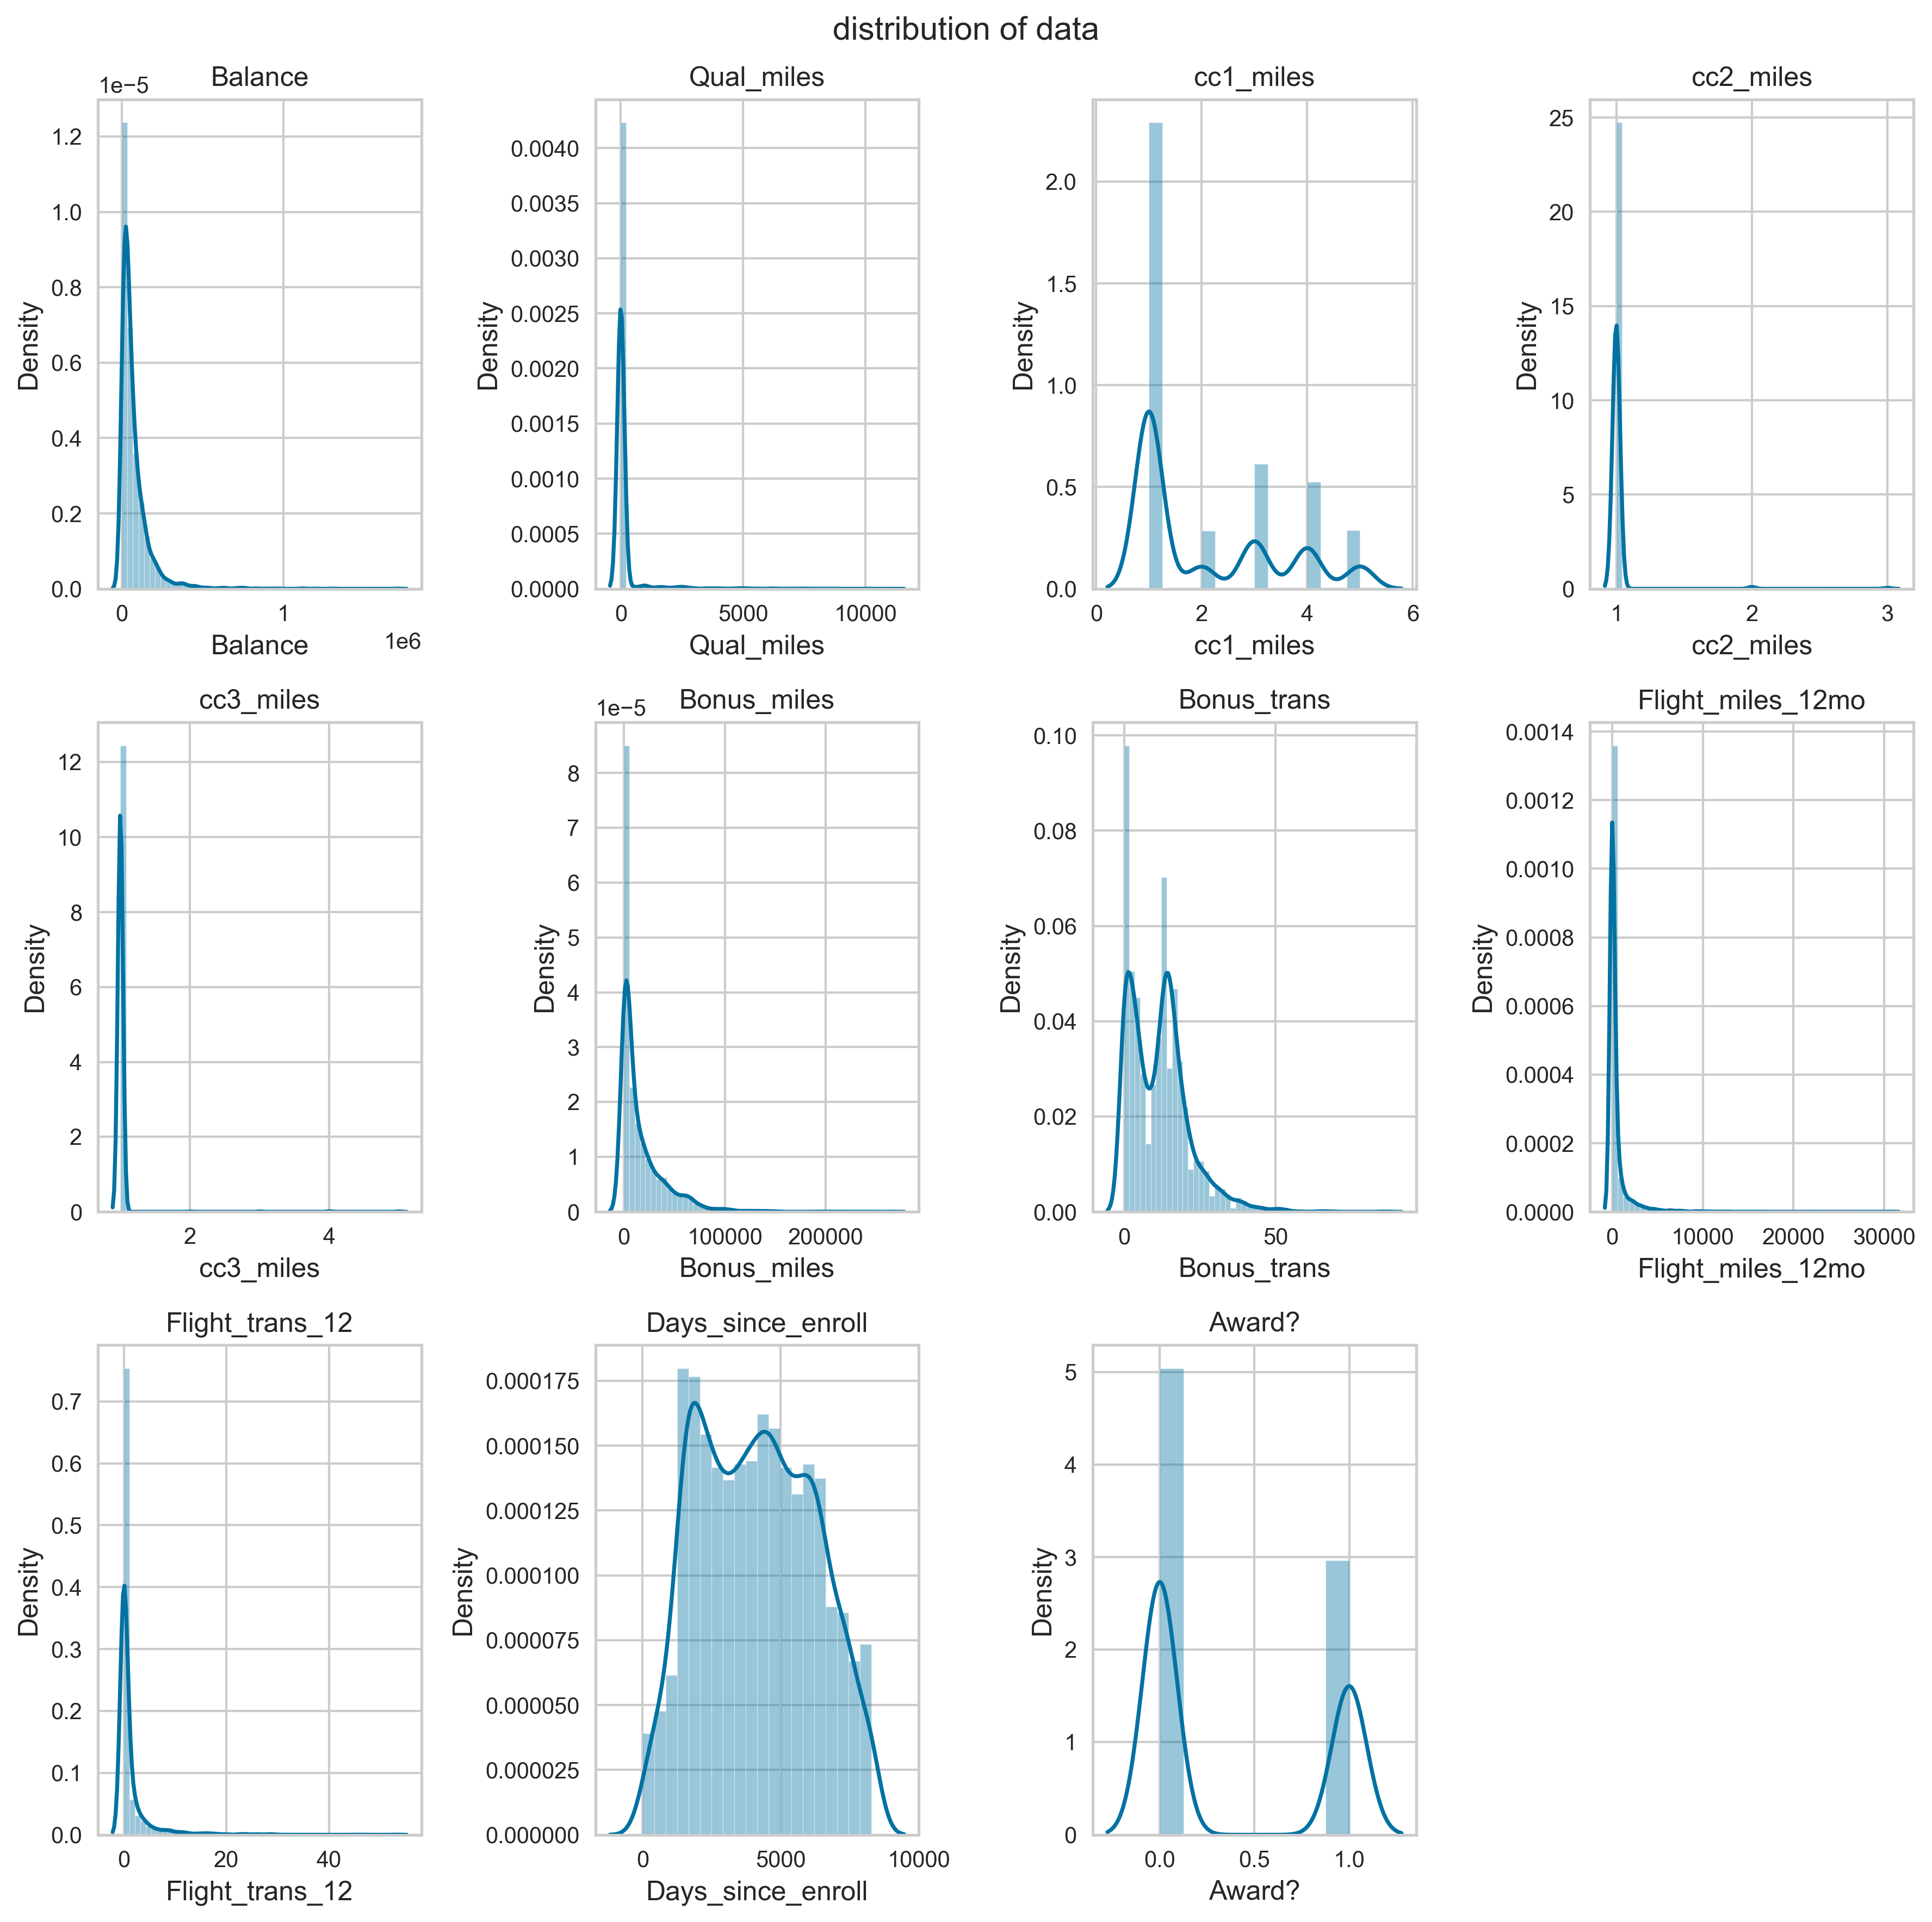

In [8]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of data")
for i in df.loc[:,:]:
    plt.subplot(3,4,k)
    sns.distplot(df[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

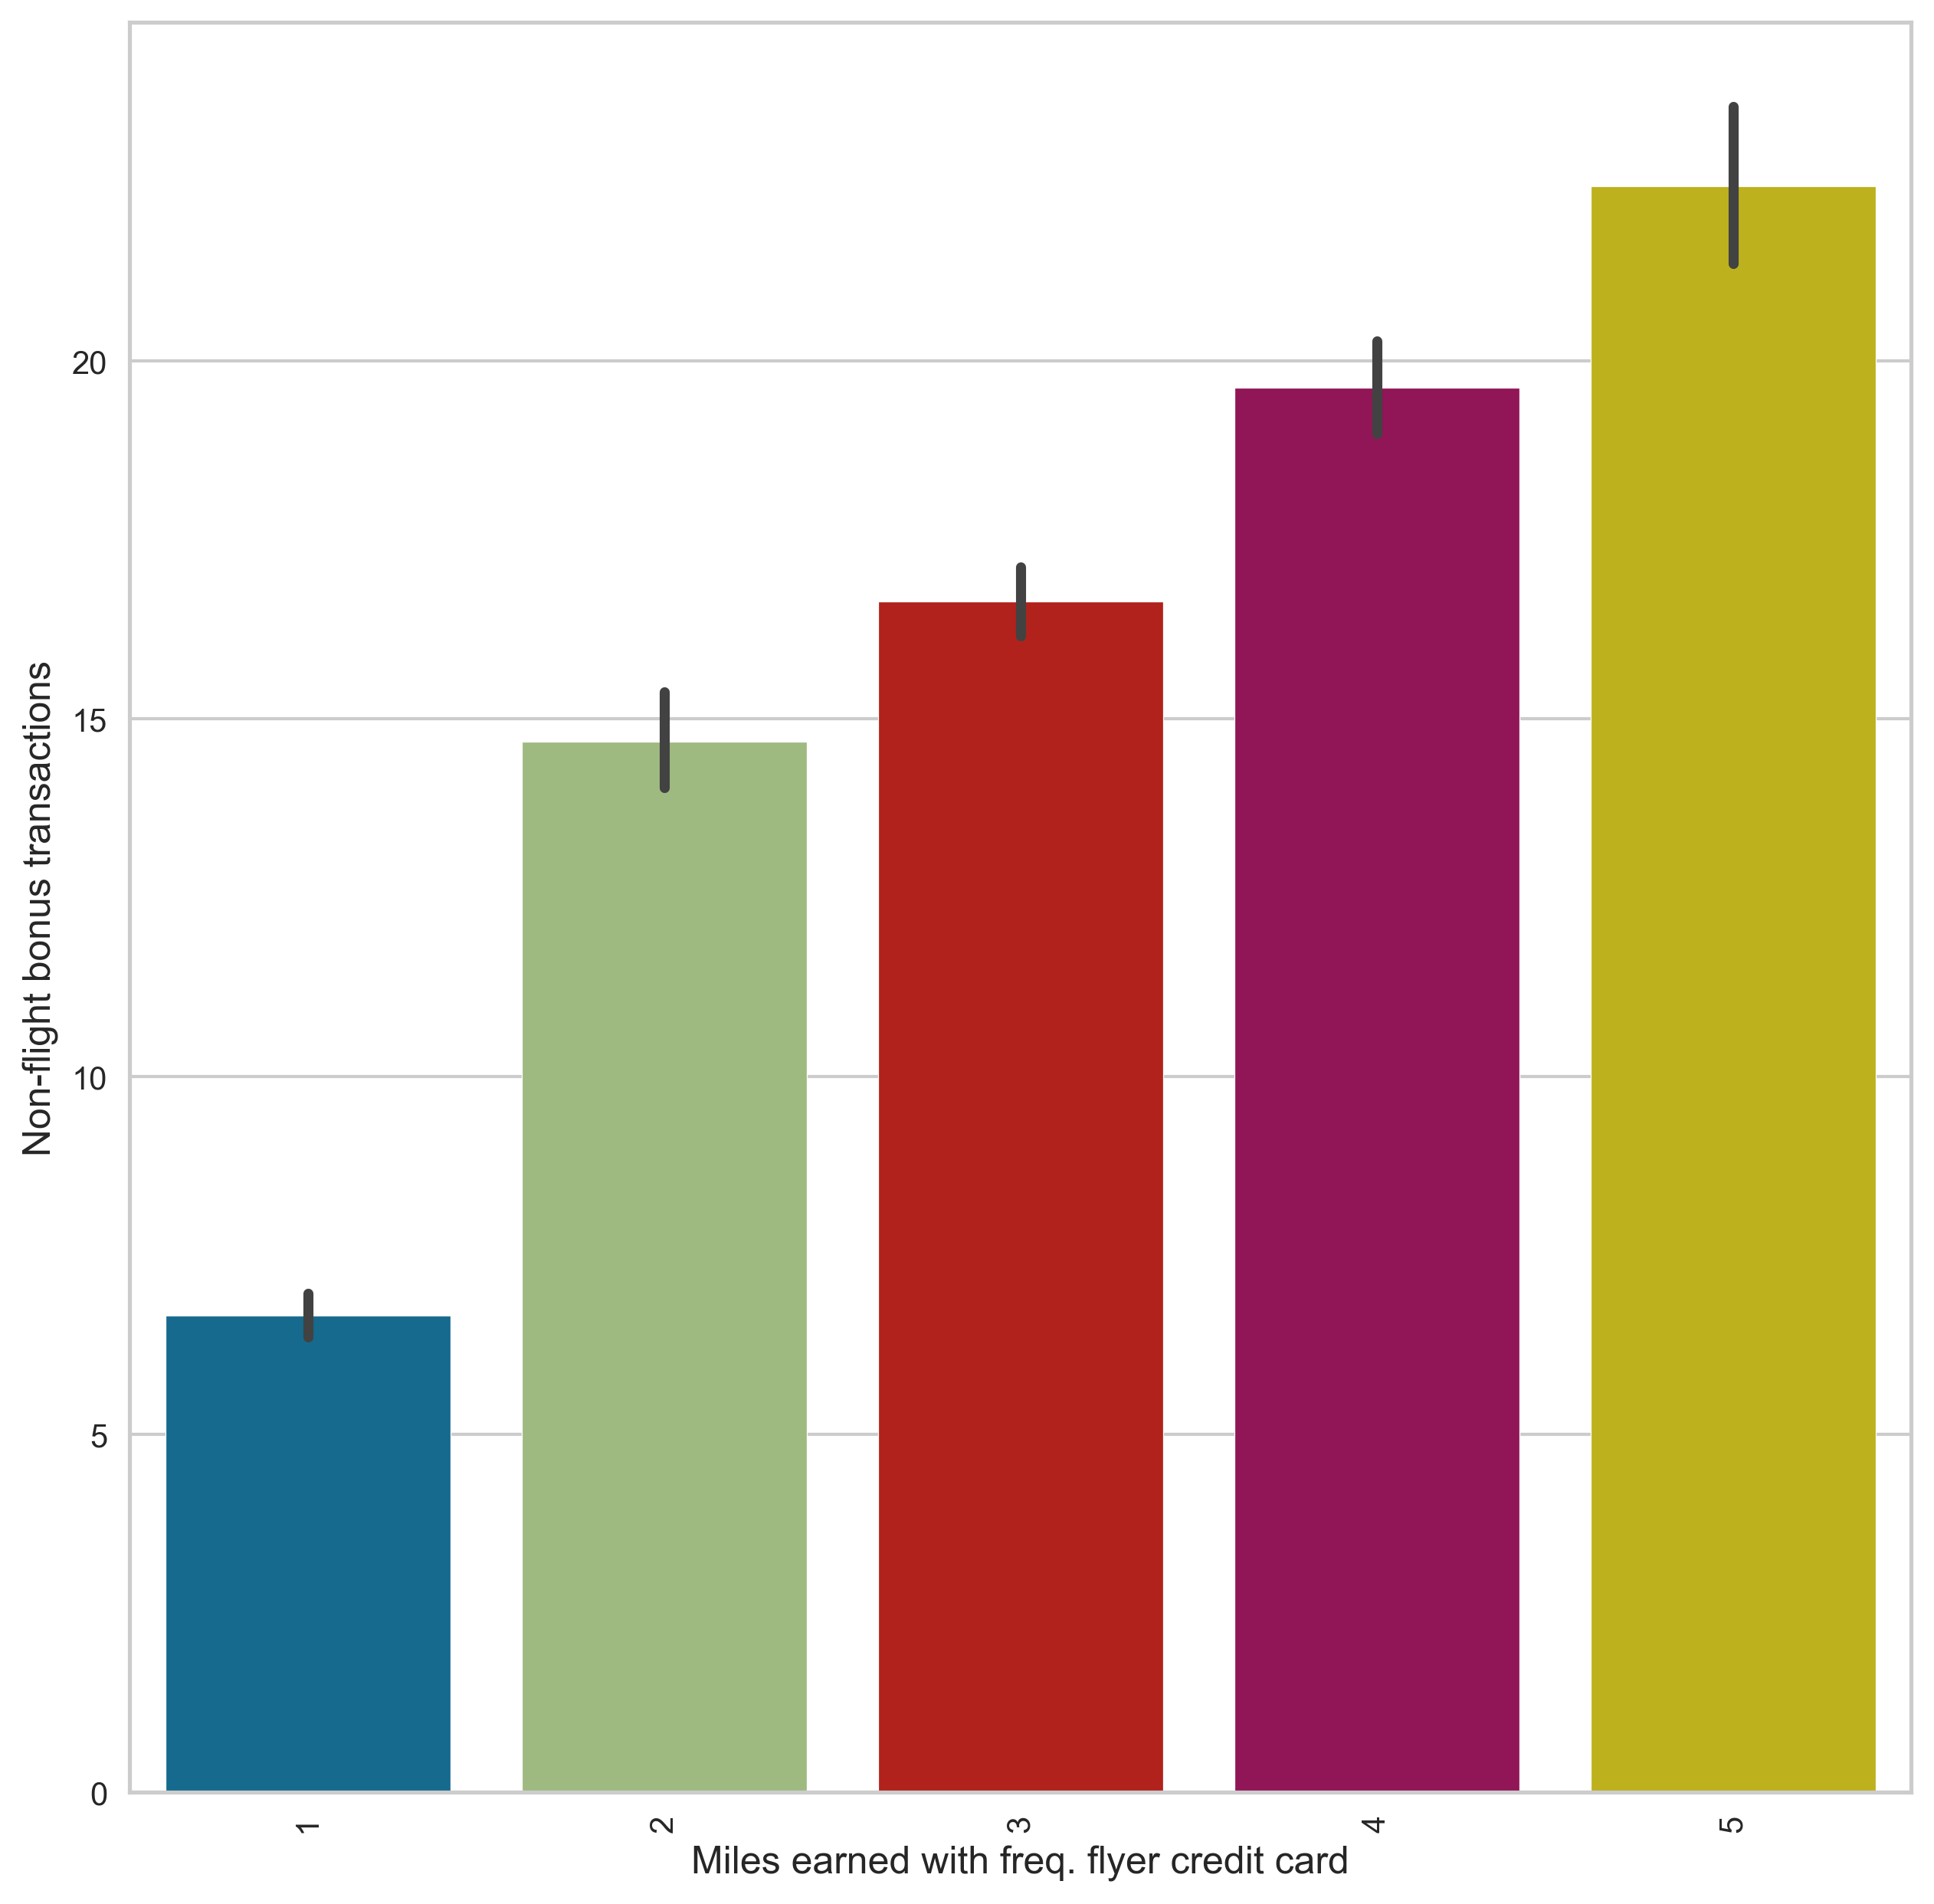

In [9]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [10]:
countNotermdeposit = len(df[df['Award?'] == 0])
counthavetermdeposit = len(df[df['Award?'] == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(df['Award?']))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(df['Award?']))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


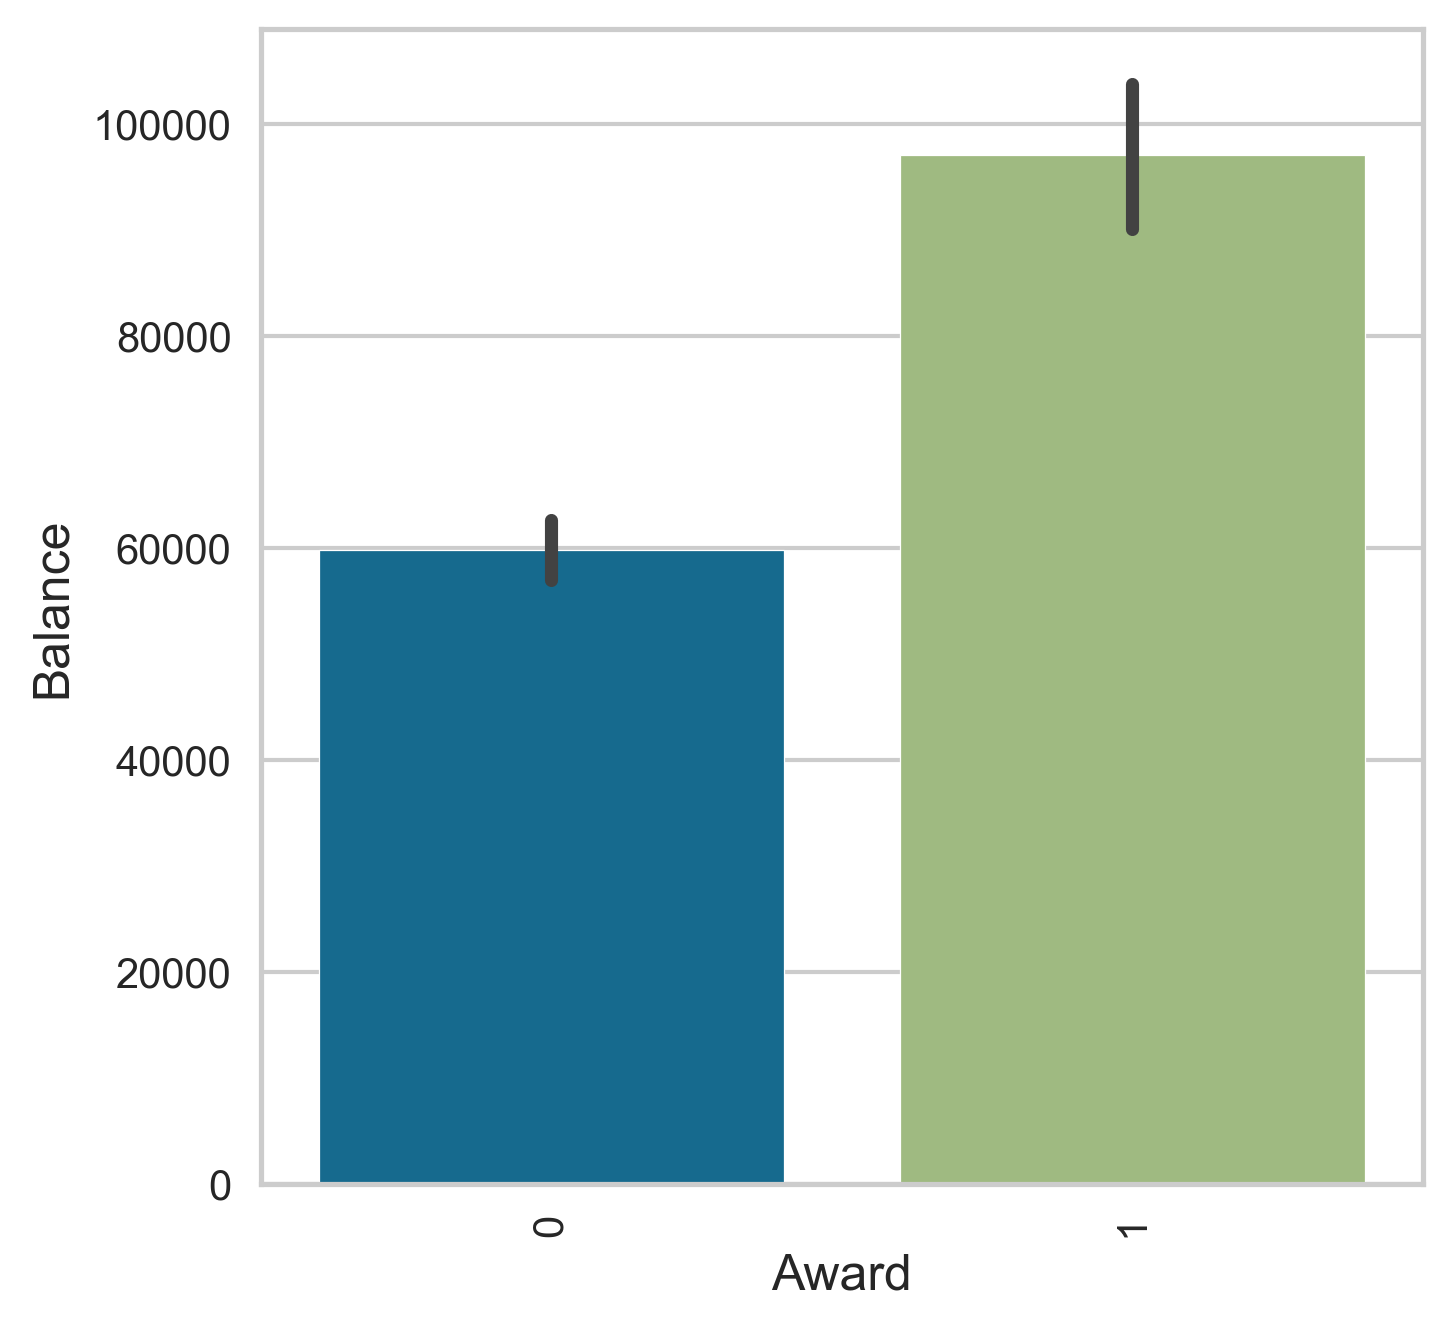

In [11]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = df[['Award?','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award?', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [12]:
# what is correlated with Balance?

corr_matrix = df.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award?               0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

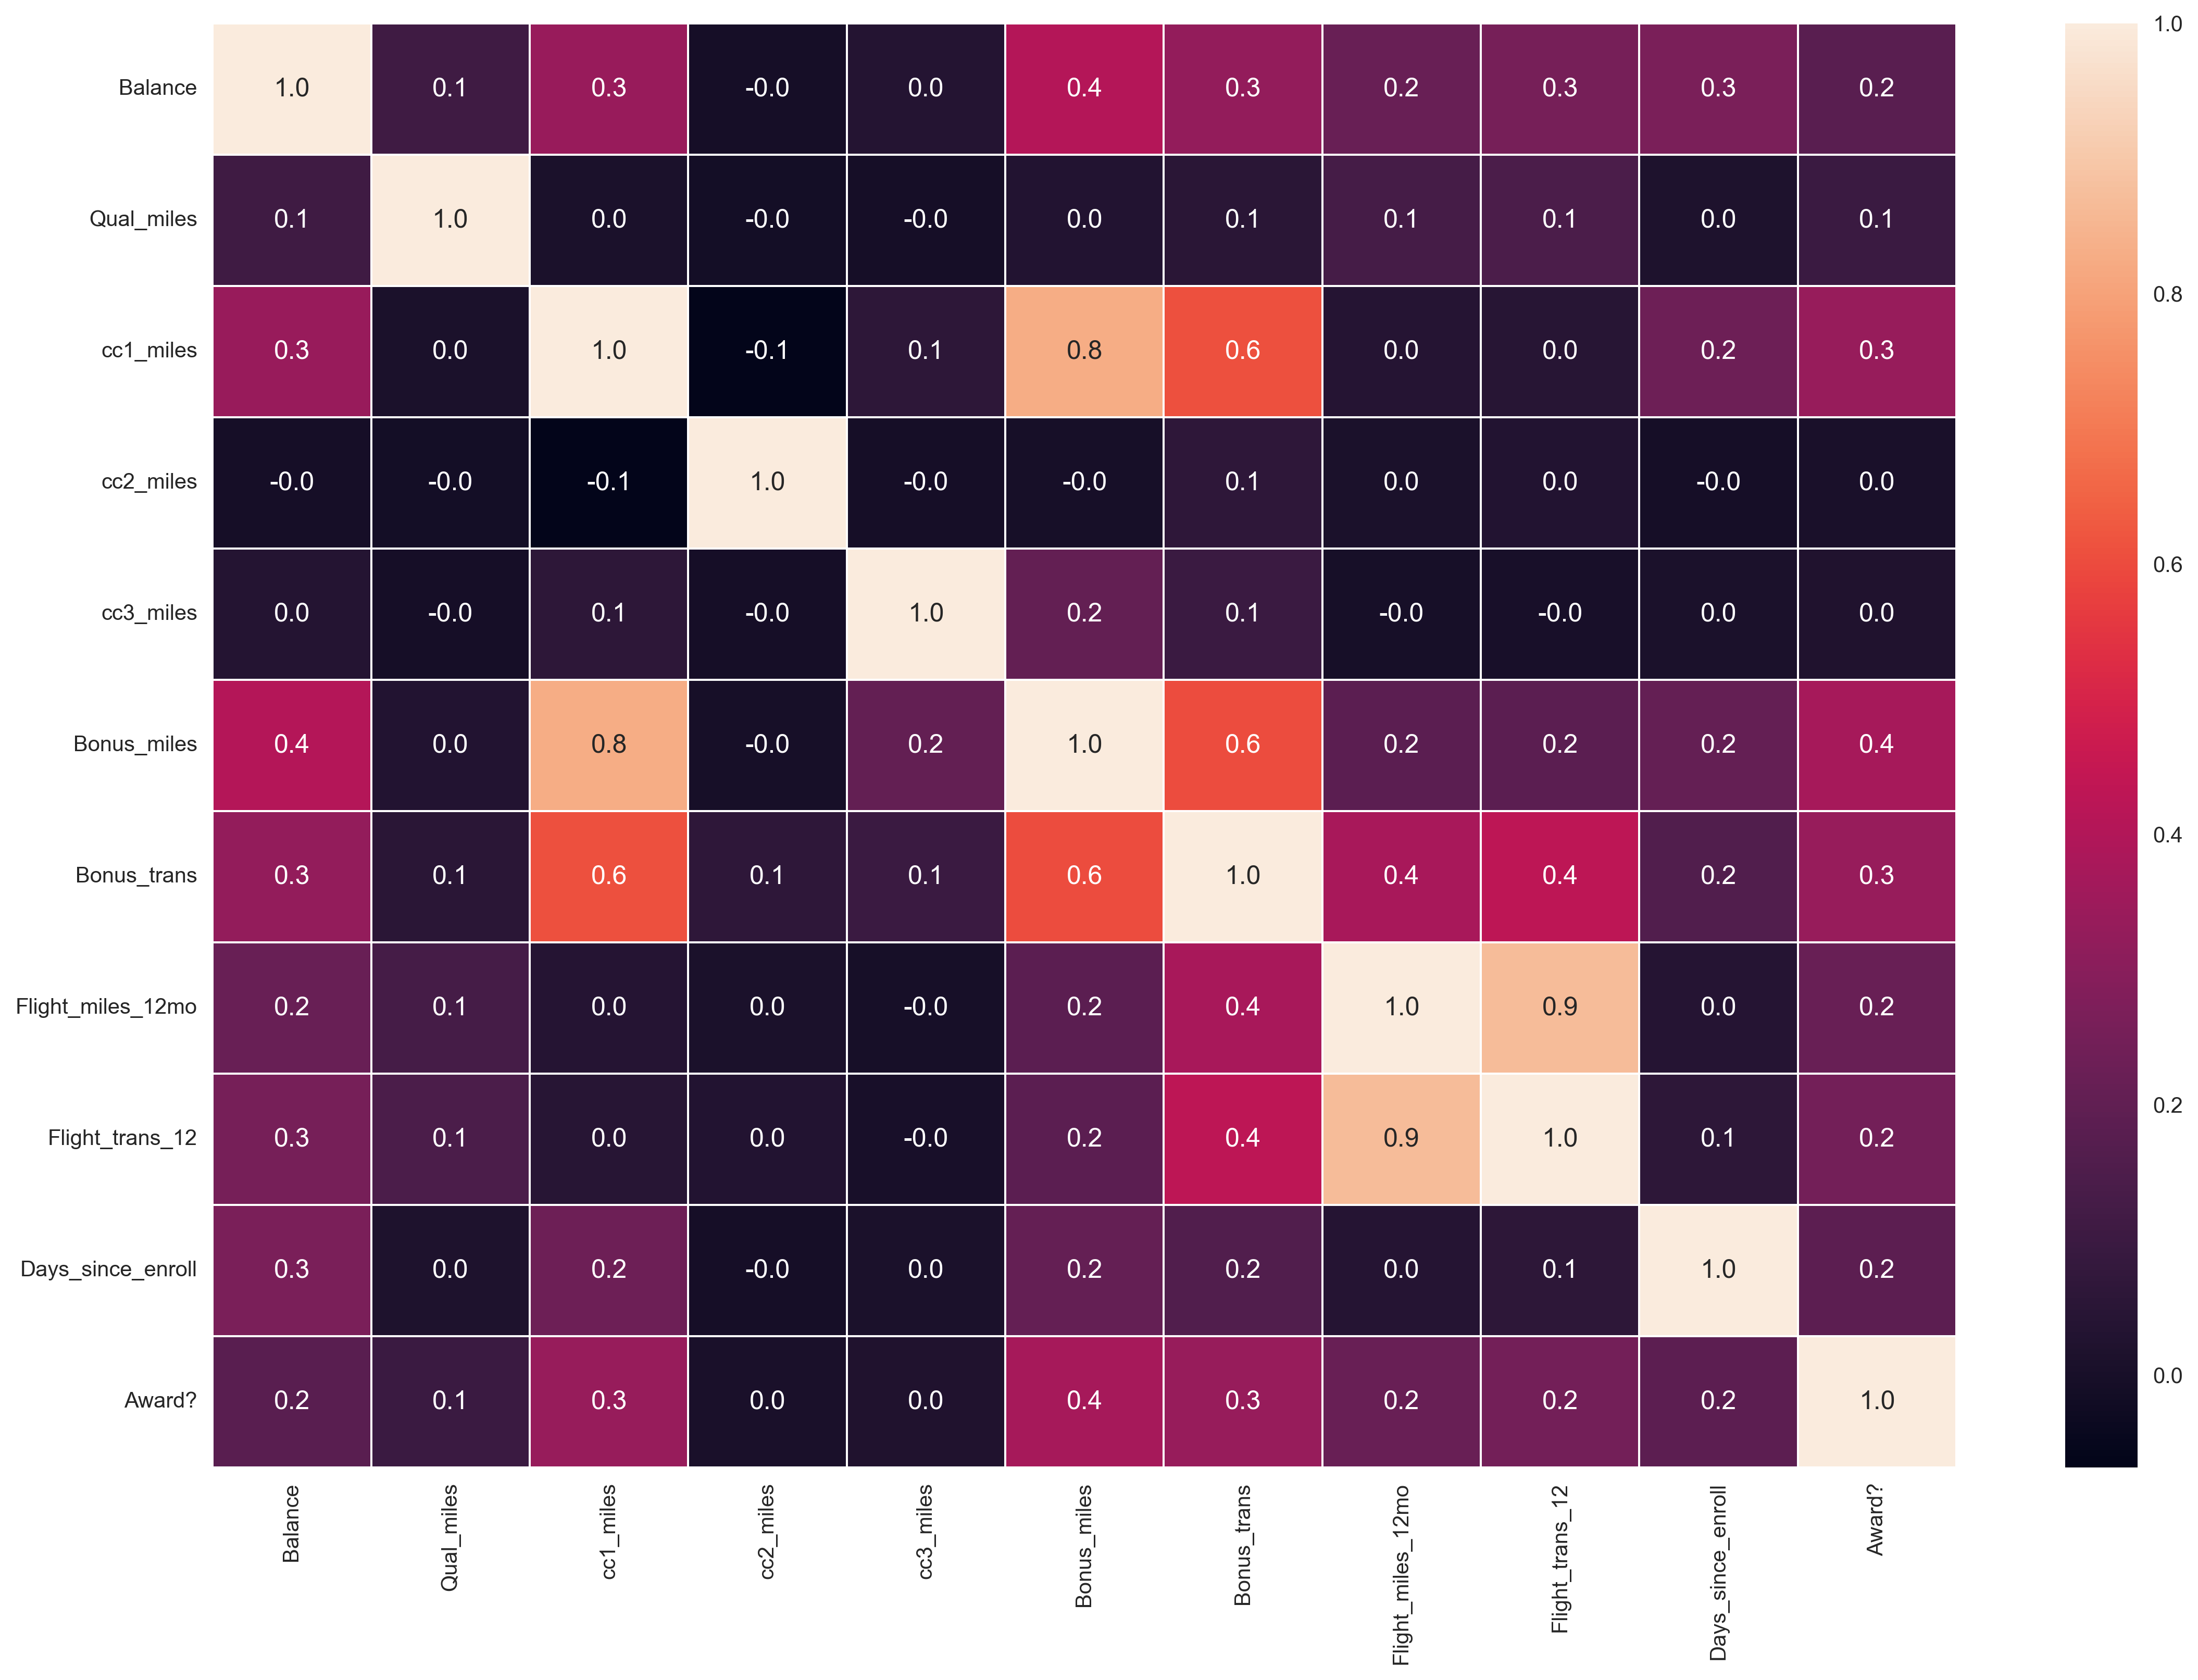

In [13]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

### Hierarchy Clustering

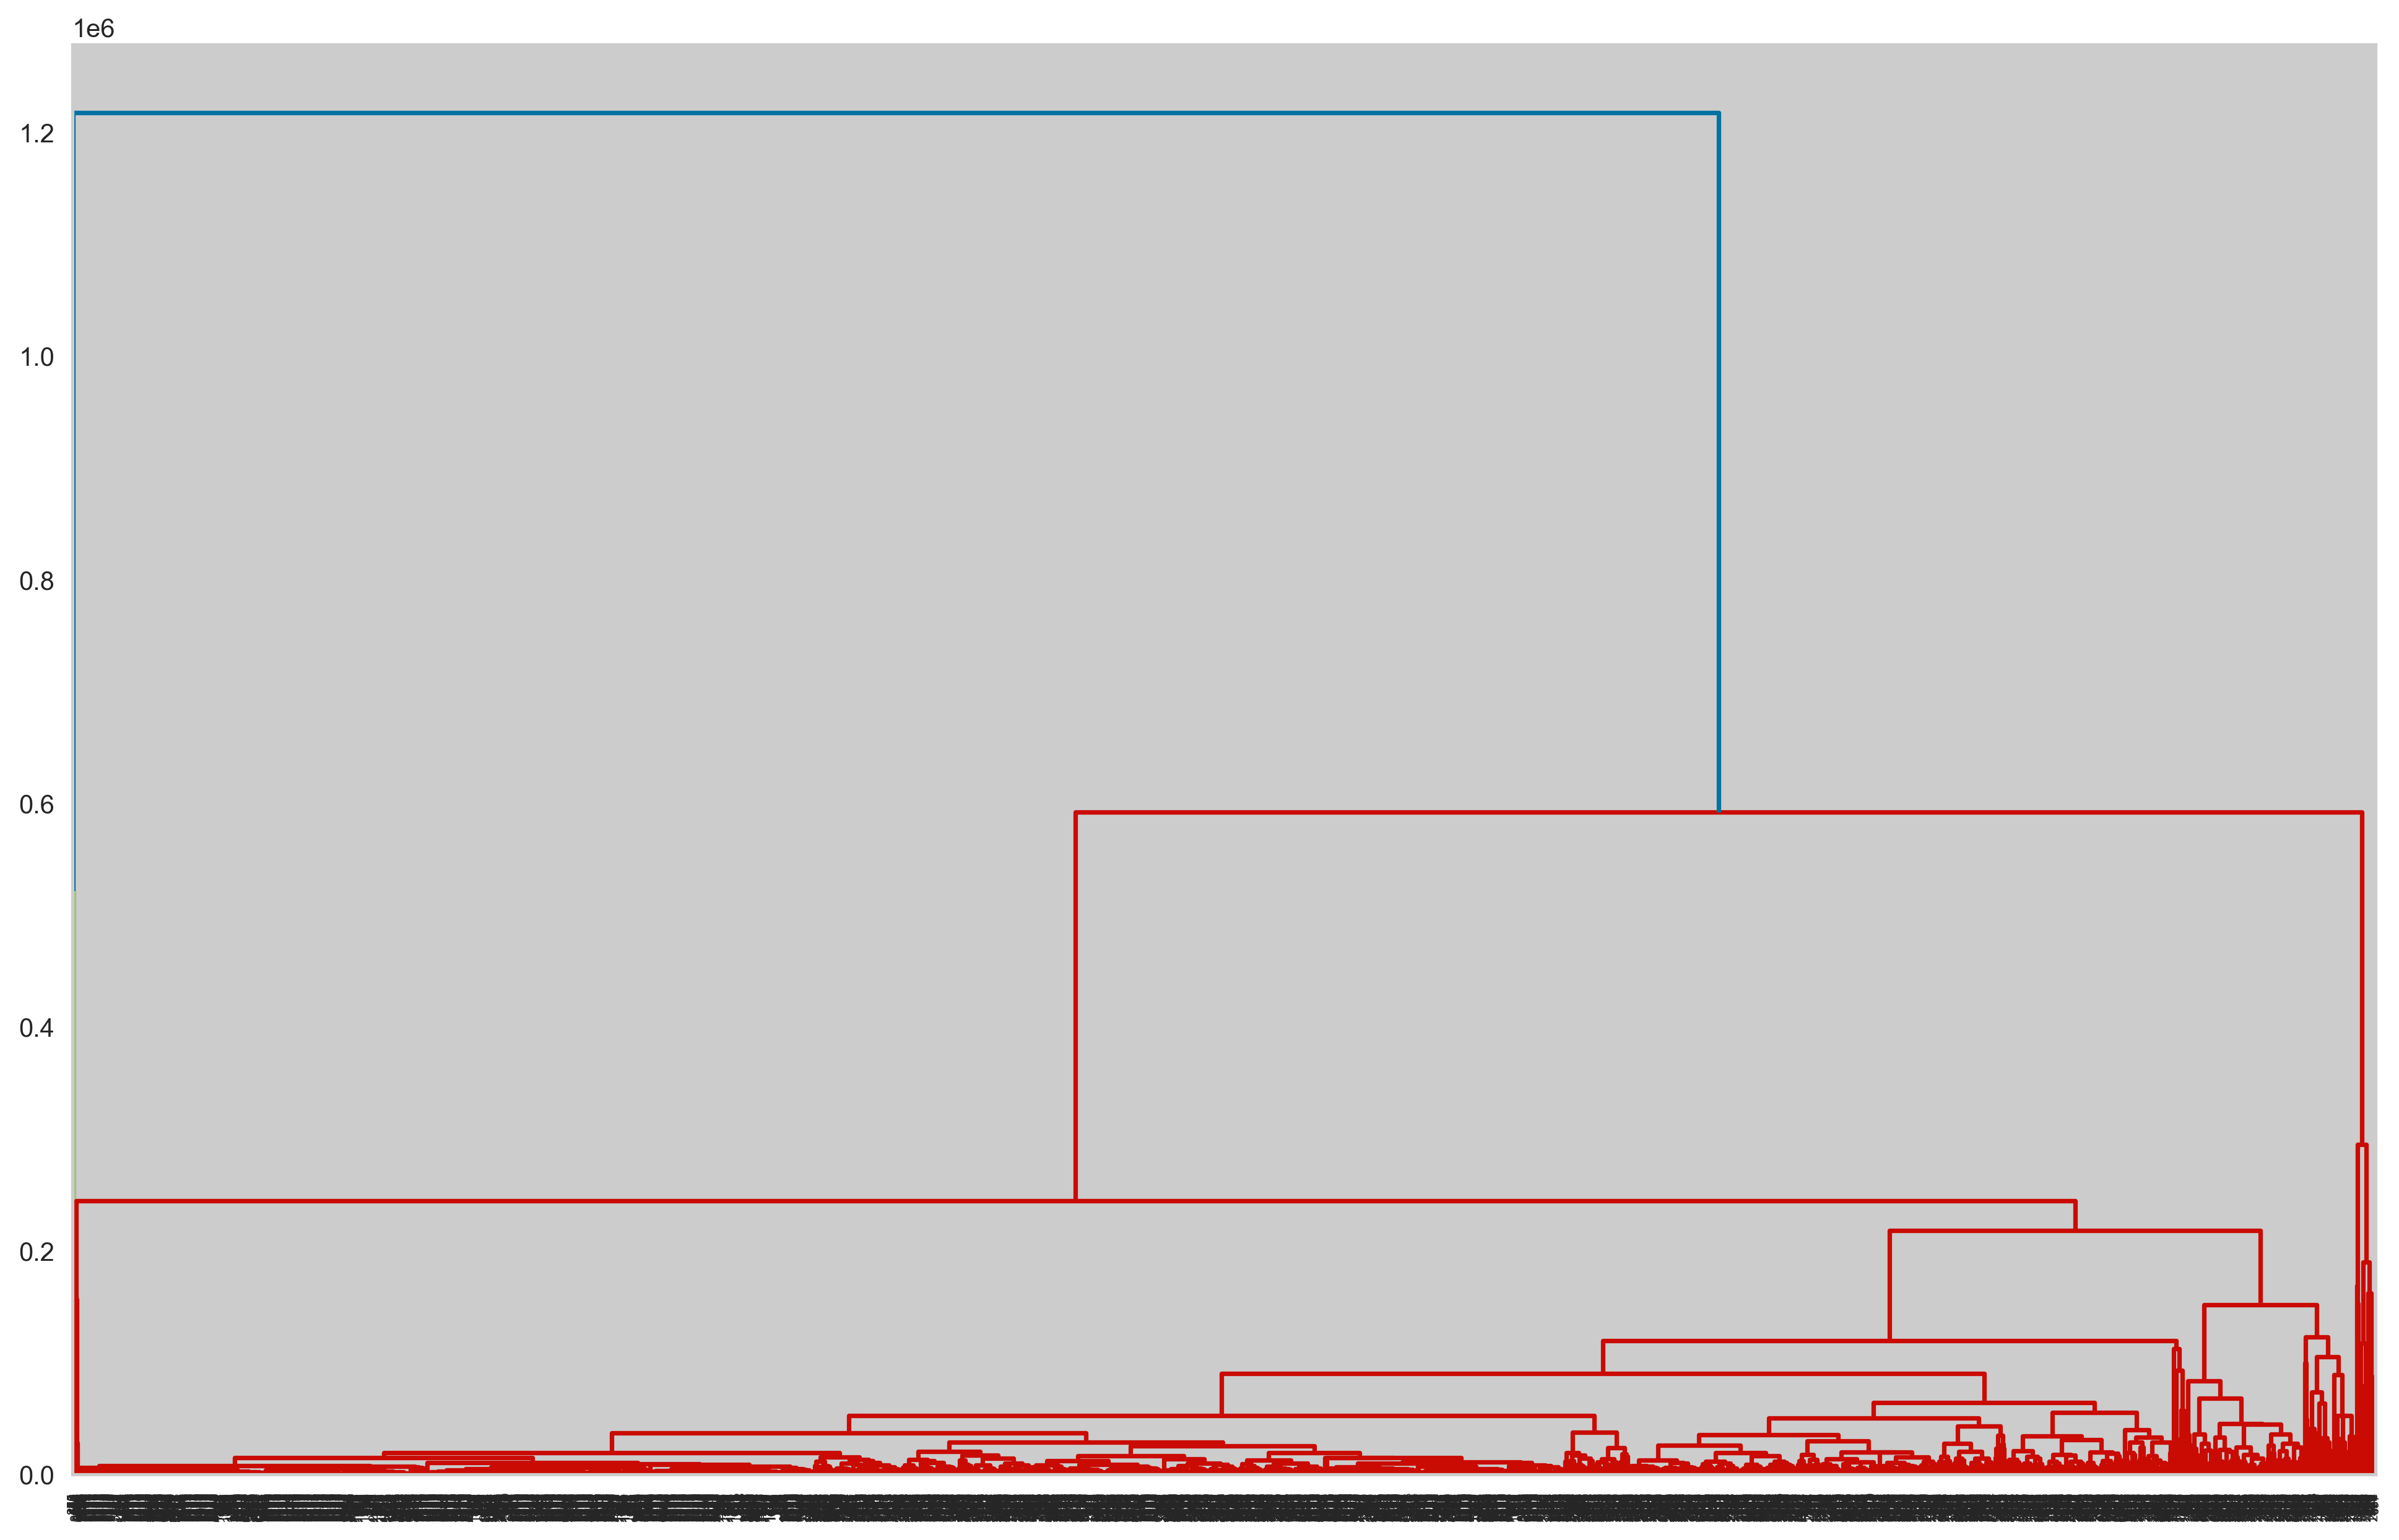

In [14]:
# create dendrogram
plt.figure(figsize = (16, 10));
dendrogram = hierarchy.dendrogram(hierarchy.linkage(df, method='average'))

In [15]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [16]:
# save clusters for chart
y_hc = hc.fit_predict(df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [17]:
airlines1 = pd.concat([df,Clusters], axis=1)
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,0.0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
airlines1.sort_values("Clusters")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0.0
2678,27438.0,0.0,1.0,1.0,1.0,2528.0,6.0,2528.0,6.0,2490.0,0.0,0.0
2679,14748.0,0.0,1.0,1.0,1.0,2210.0,7.0,0.0,0.0,2497.0,1.0,0.0
2680,49514.0,0.0,1.0,1.0,1.0,4500.0,22.0,0.0,0.0,2569.0,0.0,0.0
2681,7457.0,0.0,1.0,1.0,1.0,17131.0,5.0,0.0,0.0,2496.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,1.0,NaN
4018,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,1.0,NaN
4019,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,1.0,NaN
4020,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0,NaN


### K-Means

In [19]:
kmeans = KMeans(n_clusters=14,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=14, random_state=0)

In [20]:
kmeans.inertia_

1841543617565.6873

In [21]:
wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [22]:
wcss

[42961820046587.05,
 20823632642041.96,
 11789152716591.457,
 7549630961801.501,
 5724534080291.383,
 4541450673874.507,
 3697650531971.0425,
 3274444604278.7236,
 2901855404997.851,
 2625541177335.49,
 2390220640301.128,
 2140955377567.307,
 1969262451661.1785,
 1841543617565.6873,
 1693202436737.685,
 1576803270182.3215,
 1482154881425.4124,
 1376876985840.8574]

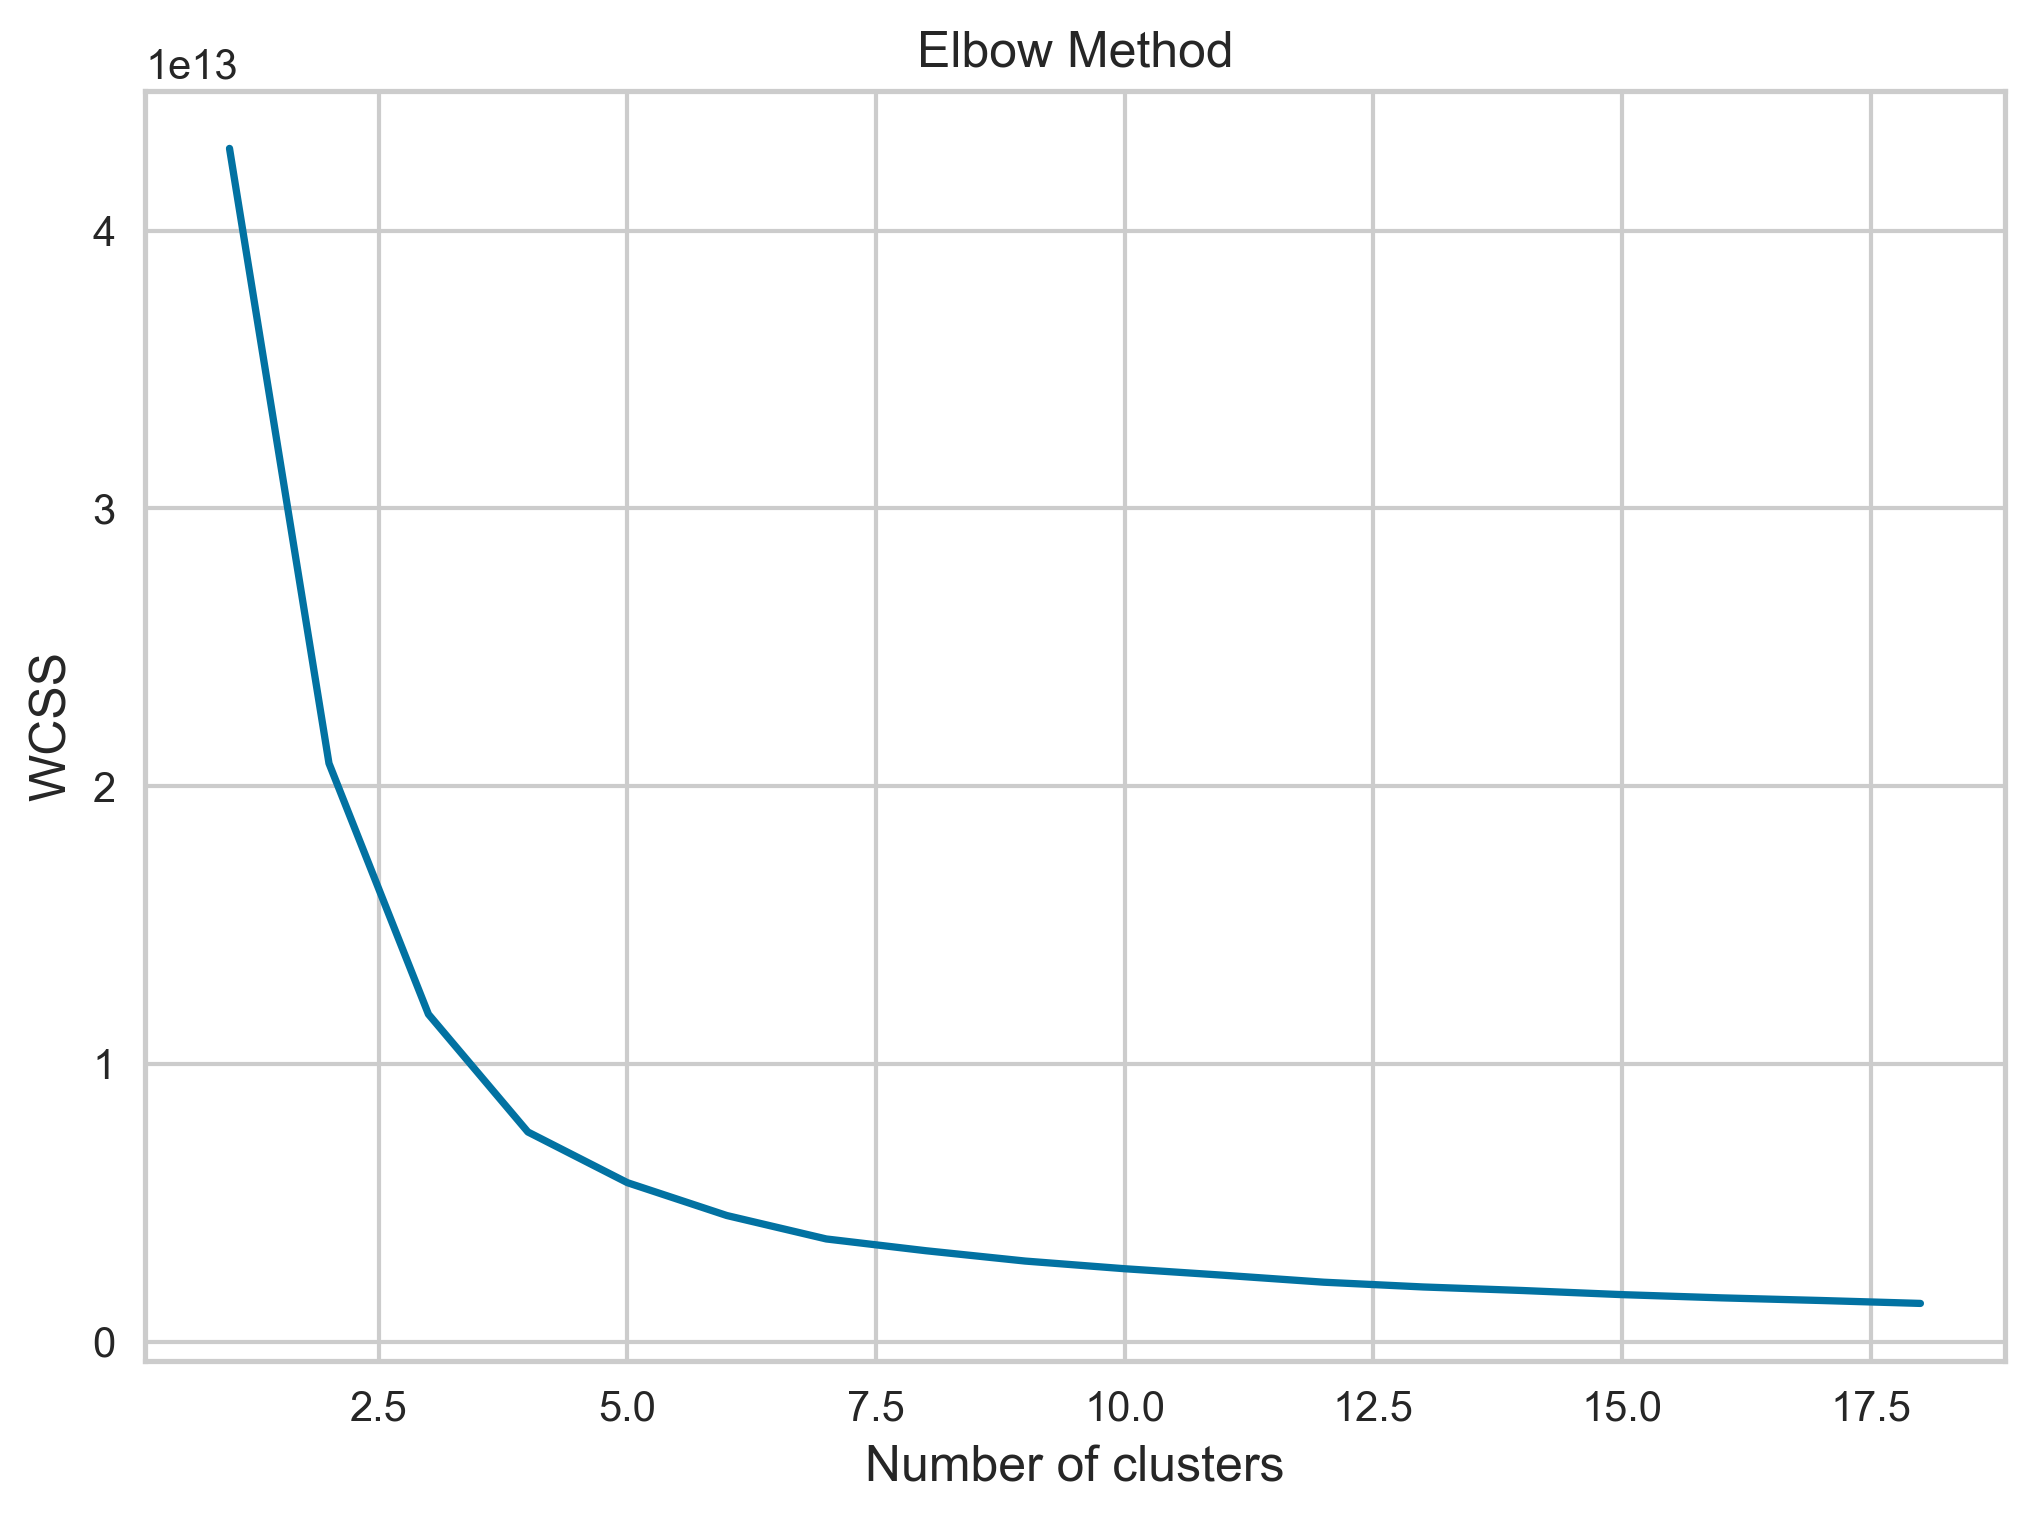

In [23]:
plt.plot(range(1, 19), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### OR

In [24]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=0)
clusters_new.fit(df)

KMeans(n_clusters=7, random_state=0)

In [25]:
clusters_new.labels_

array([3, 3, 3, ..., 0, 0, 3])

### DBSCAN

In [26]:
df.head(4)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0


In [27]:
a=df.values
a

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [28]:
stscaler = StandardScaler().fit(a)
X1 = stscaler.transform(a)

In [29]:
dbscan = DBSCAN(eps=0.82, min_samples=6)
dbscan.fit(X1)

DBSCAN(eps=0.82, min_samples=6)

In [30]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [33]:
airlines4 = pd.concat([df,cl],axis=1)
airlines4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,-1.0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [34]:
airlines4['Cluster'].value_counts()

 0.0    2222
 1.0     956
-1.0     801
 2.0      13
 3.0       7
Name: Cluster, dtype: int64